### Lab 5 - Classification with Decision Trees

The mpg.csv dataset contains information on miles per gallon (mpg) and engine size for cars sold from 1970 through 1982.

Create a dataframe X containing the features cylinders, weight, and mpg.  
Create a dataframe y containing the feature origin.  
Initialize and fit a classification tree with max_leaf_nodes=6 to the training data.  
Use the classification tree to make predictions for the test data.
Create a confusion matrix.  
Ex: If the input feature displacement is used instead of cylinders, the output should be:

```python

|--- feature_0 <= 121.50
|   |--- feature_0 <= 97.25
|   |   |--- class: japan
|   |--- feature_0 >  97.25
|   |   |--- feature_0 <= 99.00
|   |   |   |--- class: usa
|   |   |--- feature_0 >  99.00
|   |   |   |--- feature_2 <= 26.50
|   |   |   |   |--- class: europe
|   |   |   |--- feature_2 >  26.50
|   |   |   |   |--- class: japan
|--- feature_0 >  121.50
|   |--- feature_0 <= 191.00
|   |   |--- class: usa
|   |--- feature_0 >  191.00
|   |   |--- class: usa
```


![My Image](images/lab5-trees-heat.png)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:
# Read in the data from mpg.csv and save it as a dataframe called mpg
mpg = pd.read_csv('data/mpg.csv')
plt.rcParams['figure.dpi'] = 150

|--- feature_0 <= 5.50
|   |--- feature_2 <= 30.95
|   |   |--- feature_1 <= 1947.50
|   |   |   |--- class: europe
|   |   |--- feature_1 >  1947.50
|   |   |   |--- feature_1 <= 2901.50
|   |   |   |   |--- feature_1 <= 2379.50
|   |   |   |   |   |--- class: japan
|   |   |   |   |--- feature_1 >  2379.50
|   |   |   |   |   |--- class: usa
|   |   |   |--- feature_1 >  2901.50
|   |   |   |   |--- class: europe
|   |--- feature_2 >  30.95
|   |   |--- class: japan
|--- feature_0 >  5.50
|   |--- class: usa



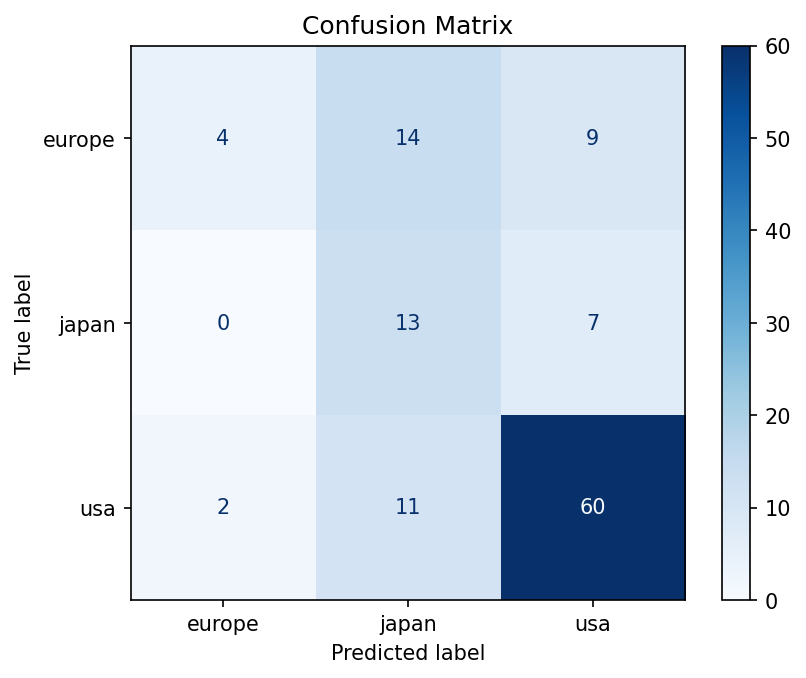

In [12]:
# Create a dataframe X containing cylinders, weight, and mpg
X = mpg[['cylinders', 'weight', 'mpg']]

# Create a dataframe y containing origin
y = mpg['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize the tree with `max_leaf_nodes=6`
DTC = DecisionTreeClassifier(max_leaf_nodes=6, random_state=123)

# Fit the tree to the training data
DTC.fit(X_train, y_train)

DTR_tree = export_text(DTC)
print(DTR_tree)

# Confusion matrix
y_pred = DTC.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

